In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [2]:
#한글 처리를 위해 폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
df=pd.read_csv('C:/Users/tjoeun/Desktop/송수린/workspace/weather_project/data/기상대기정보.csv')

In [4]:
df.head()

,지점명,일시,지점,기온(°C),강수여부,풍속(m/s),풍향(16방위),습도(%),현지기압(hPa),해면기압(hPa),...,Ozon,NO2,CO,SO2,증기압(hPa),이슬점온도(°C),시정(10m),지면온도(°C),월,전날기온
0,철원,2018-08-02 01:00:00,95,28.2,0,1.0,50.0,79.0,987.3,1004.6,...,0.023,0.003,0.3,0.001,30.2,24.2,1522.0,27.7,8,25.0
1,철원,2018-08-02 02:00:00,95,27.3,0,0.7,90.0,85.0,987.5,1004.9,...,0.024,0.003,0.3,0.001,30.7,24.5,1346.0,26.8,8,24.2
2,철원,2018-08-02 03:00:00,95,26.5,0,0.4,0.0,87.0,987.8,1005.2,...,0.024,0.003,0.2,0.001,30.0,24.1,1072.0,26.2,8,23.6
3,철원,2018-08-02 04:00:00,95,26.1,0,1.0,70.0,91.0,987.9,1005.4,...,0.024,0.002,0.2,0.001,30.7,24.5,1125.0,25.7,8,23.7
4,철원,2018-08-02 05:00:00,95,26.5,0,0.6,140.0,90.0,988.4,1005.8,...,0.021,0.002,0.2,0.001,31.1,24.7,1329.0,25.4,8,22.9


In [5]:
df.columns

Index(['지점명', '일시', '지점', '기온(°C)', '강수여부', '풍속(m/s)', '풍향(16방위)', '습도(%)',
       '현지기압(hPa)', '해면기압(hPa)', '일조(hr)', '적설(cm)', '전운량(10분위)', 'PM10',
       'PM2.5', 'Ozon', 'NO2', 'CO', 'SO2', '증기압(hPa)', '이슬점온도(°C)', '시정(10m)',
       '지면온도(°C)', '월', '전날기온'],
      dtype='object')

In [6]:
# 기온을 종속변수로 지정
y = df['기온(°C)'].copy()
X = df[df.columns[4:]].copy()

c:\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


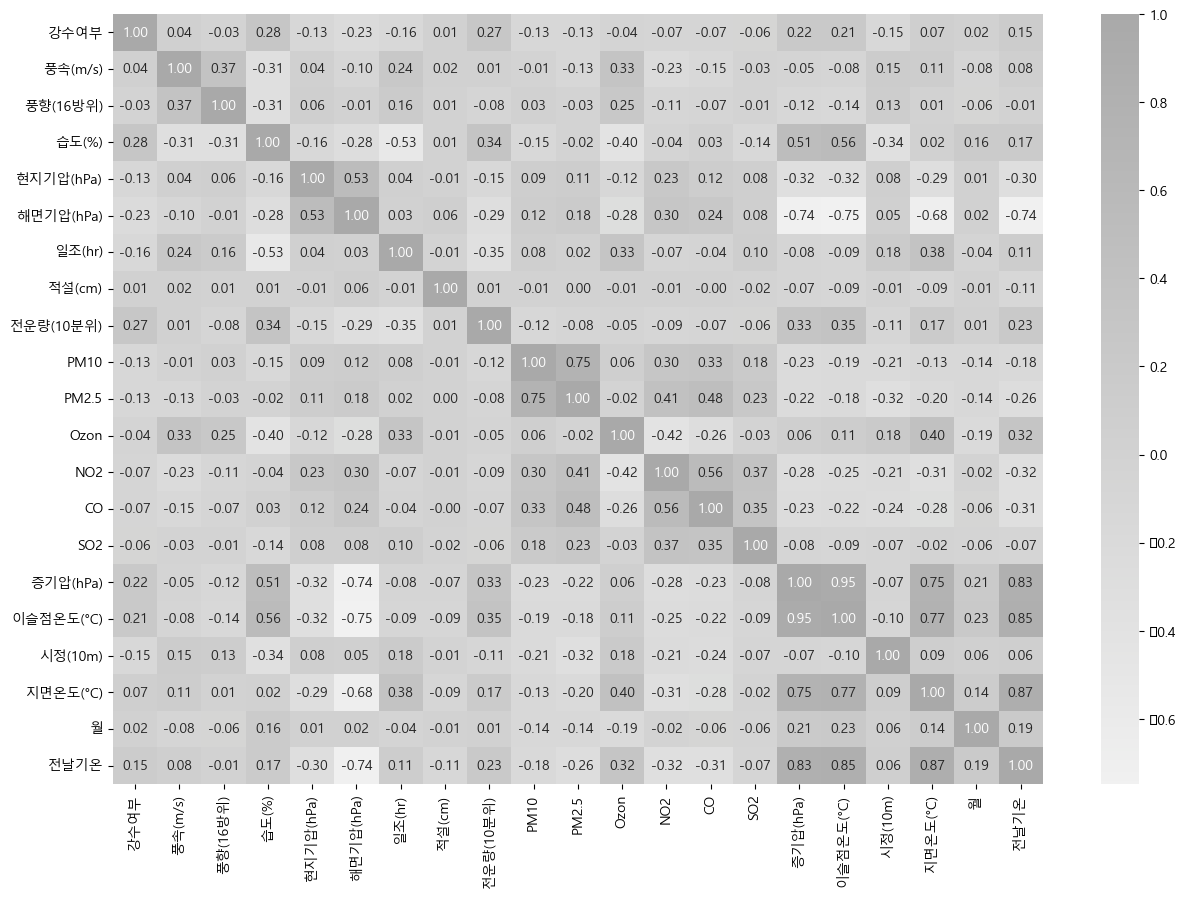

In [7]:
%matplotlib inline
plt.figure(figsize=(15,10))
cmap = sns.light_palette('darkgray', as_cmap=True)
sns.heatmap(X.corr(), annot=True, fmt='.2f', cmap=cmap)

In [8]:
# 범위형 변수 제거
X.drop(columns=['풍향(16방위)', '전운량(10분위)', '월'], axis=1, inplace=True)

In [9]:
# 더미변수 생성
X=pd.get_dummies(data=X, columns=['강수여부'])

In [10]:
scaler = StandardScaler()
scaler.fit(X.iloc[:,:-2])
X_scaled = scaler.transform(X.iloc[:,:-2])
X_scaled = pd.concat([pd.DataFrame(X_scaled), X.iloc[:,-2:]], axis=1)
X_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,강수여부_0,강수여부_1
0,-0.543789,0.446784,-1.147573,-1.434567,-0.645615,-0.070183,-0.019538,-0.005901,-0.525180,-0.874219,-0.547369,-1.069525,1.997825,1.491758,-0.335595,1.010295,1.163569,1,0
1,-0.725001,0.724630,-1.134416,-1.398730,-0.645615,-0.070183,0.151909,0.123778,-0.472111,-0.874219,-0.547369,-1.069525,2.055110,1.517753,-0.482683,0.937277,1.084297,1,0
2,-0.906213,0.817246,-1.114681,-1.362894,-0.645615,-0.070183,-0.053827,-0.031837,-0.472111,-0.874219,-1.048907,-1.069525,1.974912,1.483093,-0.711672,0.888599,1.024842,1,0
3,-0.543789,1.002477,-1.108102,-1.339002,-0.645615,-0.070183,-0.019538,-0.005901,-0.472111,-0.966011,-1.048907,-1.069525,2.055110,1.517753,-0.667378,0.848034,1.034751,1,0
4,-0.785405,0.956169,-1.075209,-1.291220,-0.645615,-0.070183,0.151909,0.123778,-0.631320,-0.966011,-1.048907,-1.069525,2.100937,1.535083,-0.496890,0.823694,0.955478,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1933328,-0.362577,-0.942446,1.247015,1.515993,-0.645615,-0.070183,-0.705324,-0.524617,0.217797,-0.415259,0.455707,0.057103,-1.015333,-1.133756,2.571060,-1.204574,-0.966888,1,0
1933329,-0.241769,-0.710908,1.247015,1.527938,-0.645615,-0.070183,-0.671035,-0.489956,0.058587,-0.139884,0.455707,0.057103,-0.980963,-1.038440,1.854007,-1.269479,-0.956979,1,0
1933330,-0.181365,-0.525677,1.279908,1.587666,-0.645615,-0.070183,-0.602456,-0.489956,0.217797,-0.507051,0.455707,0.057103,-0.958049,-0.977785,1.162862,-1.318158,-1.165070,1,0
1933331,-0.302173,-0.386754,1.253594,1.539884,-0.645615,-0.070183,-0.533877,-0.421113,0.217797,-0.507051,0.455707,0.057103,-0.969506,-1.021110,1.062574,-1.391175,-1.244343,1,0


In [11]:
X_scaled.columns = ['풍속(m/s)', '습도(%)', '현지기압(hPa)', '해면기압(hPa)', '일조(hr)', '적설(cm)', 'PM10', 'PM2.5', 
                    'O3', 'NO2', 'CO', 'SO2', '증기압(hPa)', '이슬점온도(°C)', '시정(10m)', '지면온도(°C)', '전날기온', 
                    '강수여부_0', '강수여부_1']

In [12]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
vif["features"] = X_scaled.columns
vif

,VIF Factor,features
0,1.282309,풍속(m/s)
1,6.320862,습도(%)
2,1.508060,현지기압(hPa)
3,3.590444,해면기압(hPa)
4,2.194224,일조(hr)
5,1.026503,적설(cm)
6,2.388285,PM10
7,2.954487,PM2.5
8,2.230331,O3
9,2.190011,NO2


In [13]:
# vif가 가장 높은 이슬점온도(°C) 제거
X_scaled.drop(columns=['이슬점온도(°C)'], axis=1, inplace=True)

In [14]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
vif["features"] = X_scaled.columns
vif

,VIF Factor,features
0,1.281795,풍속(m/s)
1,3.286031,습도(%)
2,1.505447,현지기압(hPa)
3,3.554252,해면기압(hPa)
4,2.164950,일조(hr)
5,1.021423,적설(cm)
6,2.386741,PM10
7,2.952684,PM2.5
8,2.137354,O3
9,2.120578,NO2


c:\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


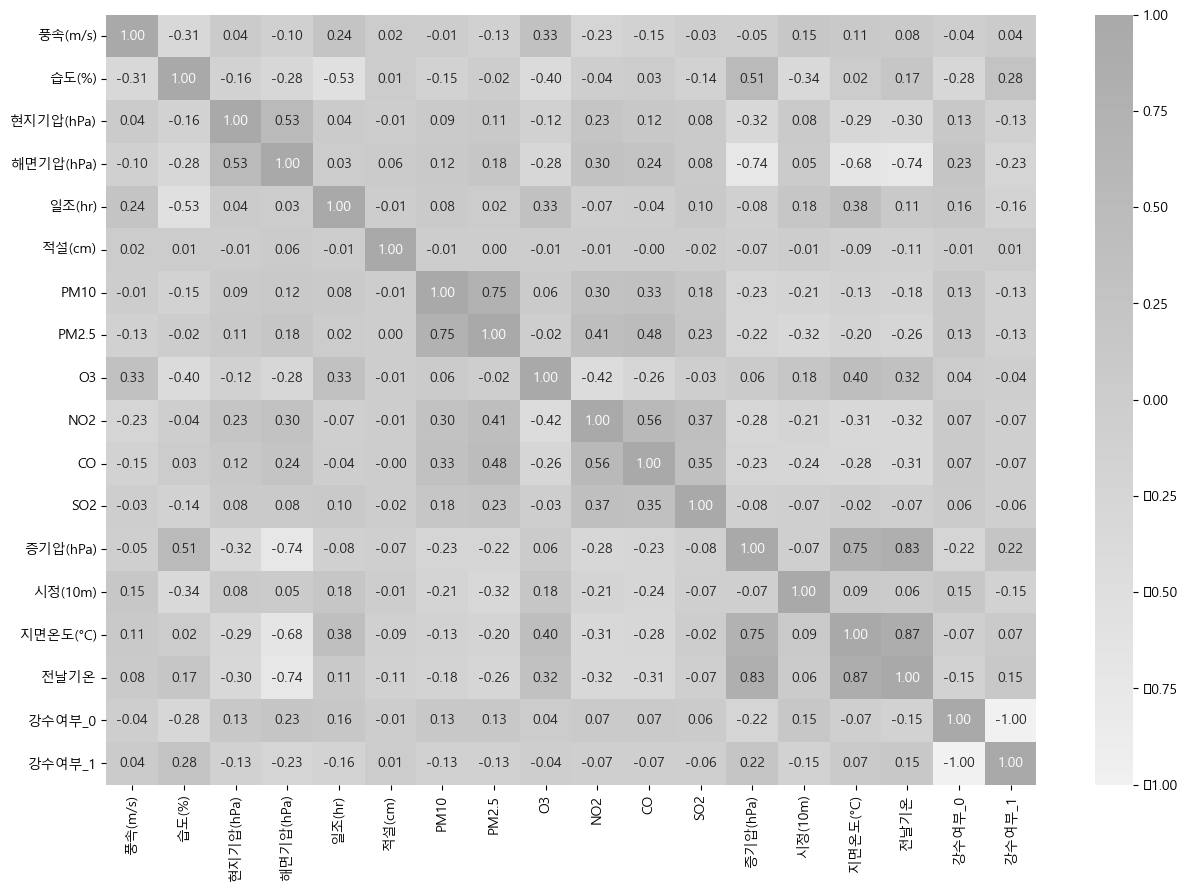

In [15]:
%matplotlib inline
plt.figure(figsize=(15,10))
cmap = sns.light_palette('darkgray', as_cmap=True)
sns.heatmap(X_scaled.corr(), annot=True, fmt='.2f', cmap=cmap)

In [16]:
# 상관계수가 높은 증기압(hPa) 제거
X_scaled.drop(columns=['증기압(hPa)'], axis=1, inplace=True)

c:\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


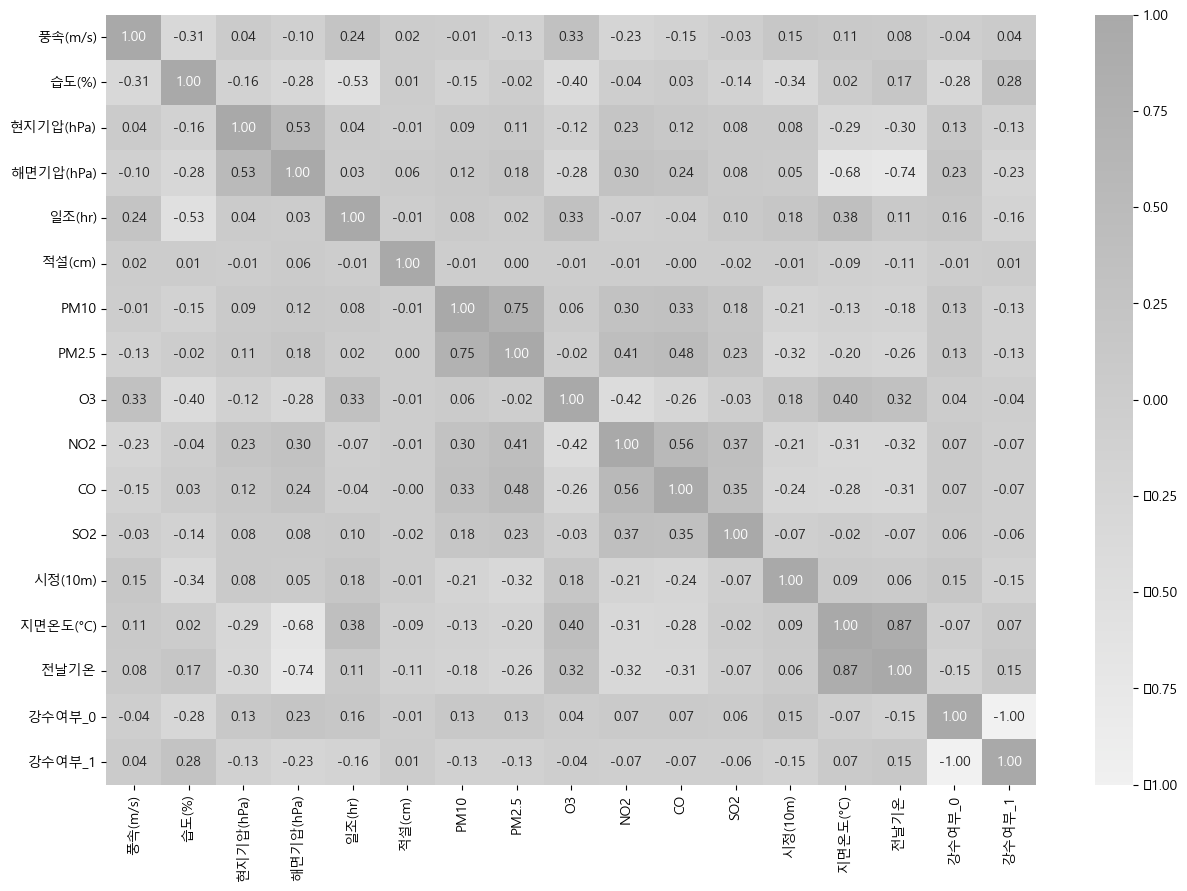

In [17]:
%matplotlib inline
plt.figure(figsize=(15,10))
cmap = sns.light_palette('darkgray', as_cmap=True)
sns.heatmap(X_scaled.corr(), annot=True, fmt='.2f', cmap=cmap)

In [18]:
# 상관계수가 높은 지면온도(°C) 제거
X_scaled.drop(columns=['지면온도(°C)'], axis=1, inplace=True)

c:\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


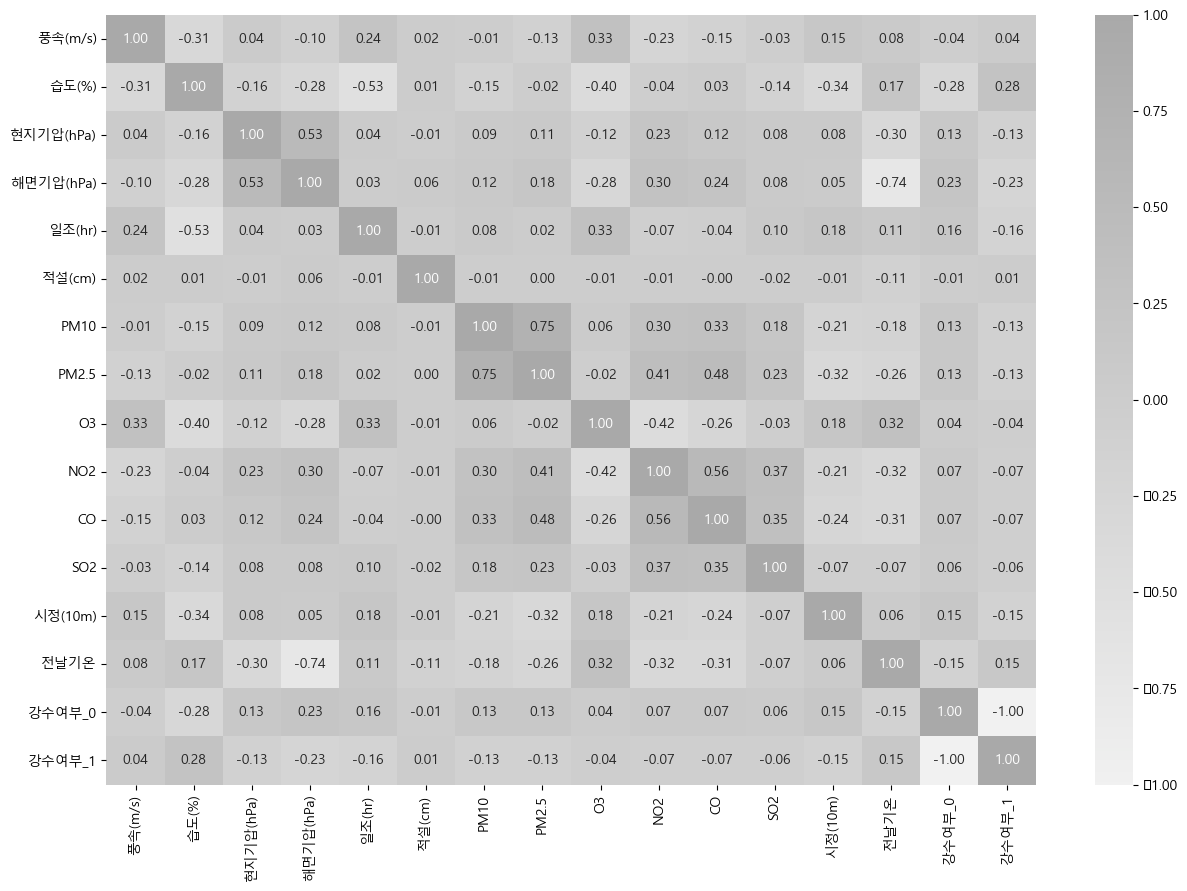

In [19]:
%matplotlib inline
plt.figure(figsize=(15,10))
cmap = sns.light_palette('darkgray', as_cmap=True)
sns.heatmap(X_scaled.corr(), annot=True, fmt='.2f', cmap=cmap)

In [20]:
# 상관계수가 높은 PM2.5 제거
X_scaled.drop(columns=['PM2.5'], axis=1, inplace=True)

c:\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


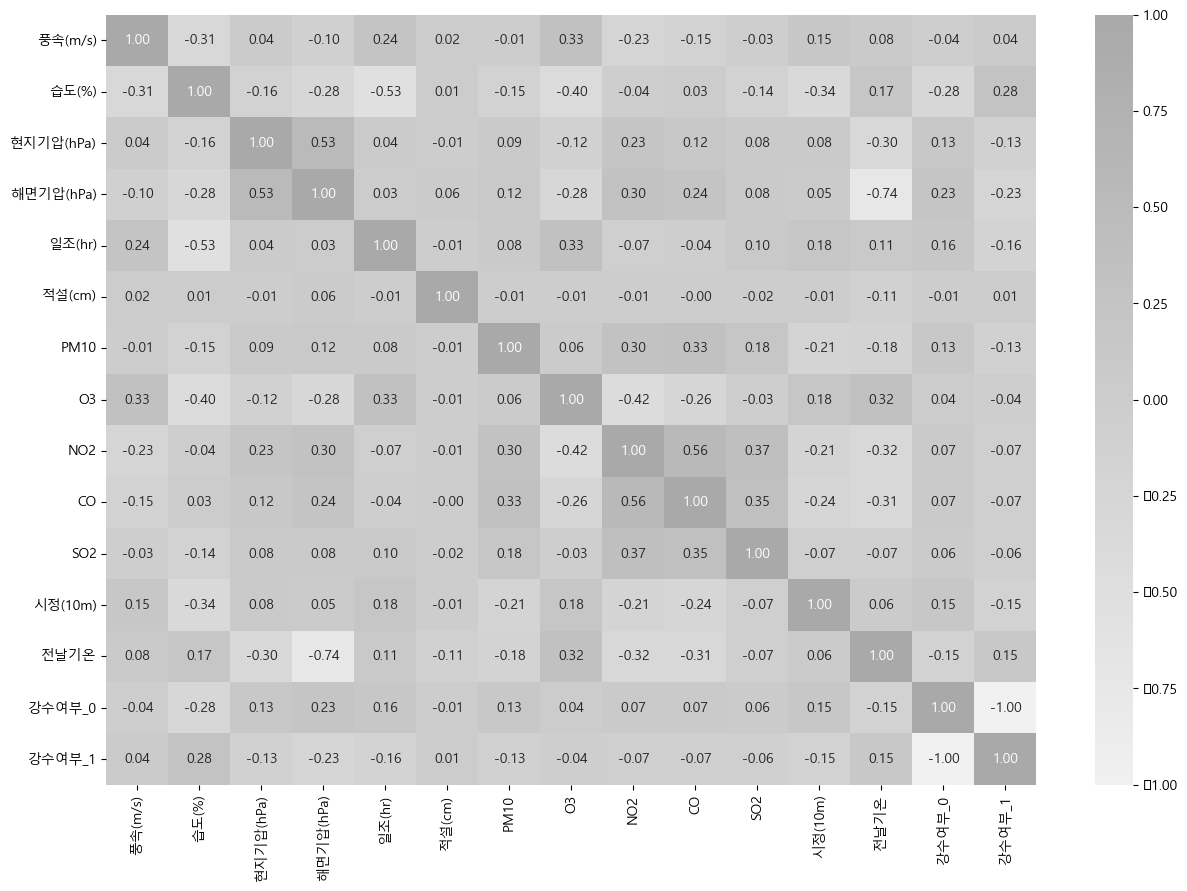

In [21]:
%matplotlib inline
plt.figure(figsize=(15,10))
cmap = sns.light_palette('darkgray', as_cmap=True)
sns.heatmap(X_scaled.corr(), annot=True, fmt='.2f', cmap=cmap)

In [22]:
# 상관계수가 높은 해면기압(hPa) 제거
X_scaled.drop(columns=['해면기압(hPa)'], axis=1, inplace=True)

In [24]:
X_scaled.to_csv('학습용.csv', index=False)

In [26]:
y.to_csv('학습용y.csv', index=False)

In [ ]:
%matplotlib inline
plt.figure(figsize=(15,10))
cmap = sns.light_palette('darkgray', as_cmap=True)
sns.heatmap(X_scaled.corr(), annot=True, fmt='.2f', cmap=cmap)

In [ ]:
model = sm.OLS(y, X_scaled)
result = model.fit()
result.summary()

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X_scaled, y, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape)

(1353333, 14) (580000, 14)


In [33]:
%%time
lin_reg = LinearRegression()
model_lin = lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
rms

CPU times: total: 3.09 s
Wall time: 799 ms


3.406331075732173

In [34]:
print('훈련용:',model_lin.score(X_train, y_train))
print('검증용:',model_lin.score(X_test, y_test))

훈련용: 0.8862933376586359
검증용: 0.8861540992890408


In [35]:
%%time
# 결정나무모델
tree_reg = DecisionTreeRegressor()
model_tree = tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
rms

CPU times: total: 13 s
Wall time: 13 s


4.097797357478106

In [36]:
print('훈련용:',model_tree.score(X_train, y_train))
print('검증용:',model_tree.score(X_test, y_test))

훈련용: 1.0
검증용: 0.835242709821038


In [37]:
%%time
# 랜덤포레스트
forest_reg=RandomForestRegressor(n_jobs=-1) #CPU full 사용
model_forest = forest_reg.fit(X_train, y_train)
y_pred=forest_reg.predict(X_test)
rms=np.sqrt(mean_squared_error(y_test, y_pred))
rms

CPU times: total: 54min 54s
Wall time: 3min 37s


2.8111651018886805

In [38]:
print('훈련용:',model_forest.score(X_train, y_train))
print('검증용:',model_forest.score(X_test, y_test))

훈련용: 0.9890821490706793
검증용: 0.9224616794973444


In [39]:
%%time
#RandomizedSearchCV() 최근에 많이 사용되고 있는 파라미터 최적화 함수
#매개변수의 범위를 지정해주면 무작위로 매개변수를 조합하여 최적의 성능 측정
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs={
 'n_estimators': randint(low=1, high=100),
 'max_features': randint(low=1, high=8),
 }
forest_reg=RandomForestRegressor(random_state=0, n_jobs=-1)
rnd_search=RandomizedSearchCV(forest_reg, param_distributions=param_distribs, cv=5, random_state=0)
rnd_search.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 359, in _sendback_result
    result_queue.put(_ResultItem(work_id, result=result,
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\externals\loky\backend\queues.py", line 244, in put
    self._writer.send_bytes(obj)
  File "C:\Users\user\anaconda3\lib\multiprocessing\connection.py", line 200, in send_bytes
    se

KeyboardInterrupt: 

In [40]:
cvres=rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(mean_score), params)

AttributeError: 'RandomizedSearchCV' object has no attribute 'cv_results_'

In [ ]:
%%time
model_RSCV_forest=rnd_search.best_estimator_
y_pred=model_RSCV_forest.predict(X_test)
rms=np.sqrt(mean_squared_error(y_test, y_pred))
rms

In [ ]:
print('훈련용:',model_RSCV_forest.score(X_train, y_train))
print('검증용:',model_RSCV_forest.score(X_test, y_test))

In [33]:
# 인공신경망
model = Sequential()
model.add(Dense(36, input_shape=(len(X_train.columns),), activation='relu', name='input'))
model.add(Dense(18, activation='relu', name='hidden-1'))
model.add(Dense(9, activation='relu', name='hidden-2'))
model.add(Dense(1, name='output')) #항등함수
model.compile(loss='mse', optimizer='adam', metrics='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 36)                540       
                                                                 
 hidden-1 (Dense)            (None, 18)                666       
                                                                 
 hidden-2 (Dense)            (None, 9)                 171       
                                                                 
 output (Dense)              (None, 1)                 10        
                                                                 
Total params: 1,387
Trainable params: 1,387
Non-trainable params: 0
_________________________________________________________________


In [40]:
%%time
np.random.seed(1234)
early_stopping = EarlyStopping(monitor='val_loss', patience=7)
hist = model.fit(X_scaled, y, epochs=500, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/500
48334/48334 [==============================] - 64s 1ms/step - loss: 9.0637 - mse: 9.0637 - val_loss: 9.2224 - val_mse: 9.2224
Epoch 2/500
44186/48334 [==========================>...] - ETA: 4s - loss: 9.0478 - mse: 9.0478

KeyboardInterrupt: 

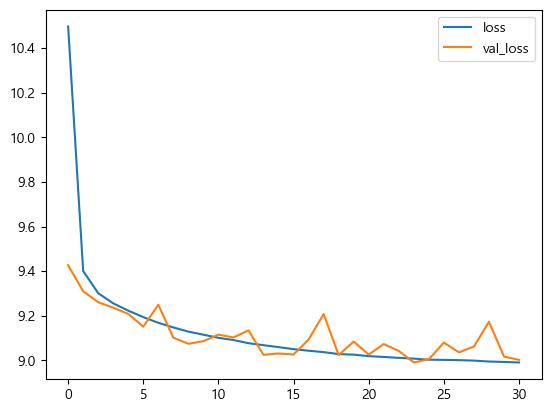

In [35]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

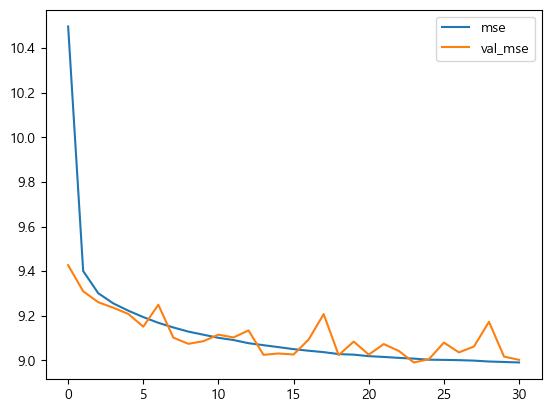

In [36]:
plt.plot(hist.history['mse'])
plt.plot(hist.history['val_mse'])
plt.legend(['mse', 'val_mse'])
plt.show()

In [37]:
scores = model.evaluate(X_train, y_train)
print(scores)
scores = model.evaluate(X_test, y_test)
print(scores)

42292/42292 [==============================] - 39s 923us/step - loss: 8.9763 - mse: 8.9763
[8.976320266723633, 8.976320266723633]
18125/18125 [==============================] - 18s 998us/step - loss: 9.0201 - mse: 9.0201
[9.020102500915527, 9.020102500915527]


In [38]:
from sklearn.metrics import r2_score
pred = model.predict(X_test)
r2_score(y_test, pred)

18125/18125 [==============================] - 14s 780us/step


0.9113426889256729